In [1]:
import nptsne
import numpy as np
from nptsne import hsne_analysis

In [2]:

X = np.load("C:\\Users\\alexa\\Desktop\\Thumos14\\features_test_set.npy")
#add the labels here
print(f'Size data: {X.shape}')
hsne = nptsne.HSne(True)
hsne.create_hsne(X, 4)
print(f'Num scales: {hsne.num_scales} Num points {hsne.num_data_points}')

Size data: (337180, 2048)
Num scales: 4 Num points 337180


In [3]:
scale3 = hsne.get_scale(3)
print(f'Num points in scale 3 {scale3.num_points}')

Num points in scale 3 1592


In [4]:
top_analysis = nptsne.hsne_analysis.Analysis(hsne,nptsne.hsne_analysis.EmbedderType.GPU)

In [5]:
for i in range(1000):
    top_analysis.do_iteration()

In [8]:
# print(len(top_analysis.landmark_orig_indexes))

1592


In [9]:
# print(top_analysis.embedding.shape)

(1592, 2)


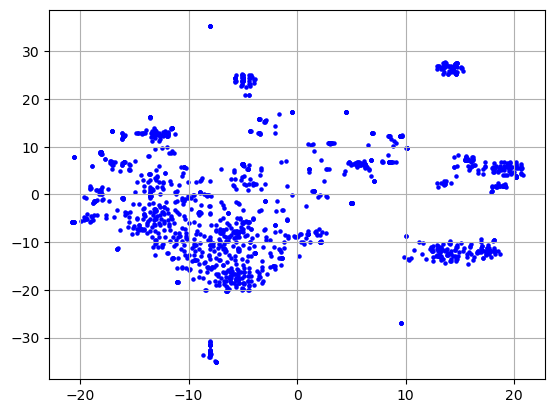

In [10]:
import matplotlib.pyplot as plt
x_coords = [point[0] for point in top_analysis.embedding]
y_coords = [point[1] for point in top_analysis.embedding]

# Create scatter plot
plt.scatter(x_coords, y_coords, s=5, color='blue')

plt.grid(True)  # Enable grid
plt.show()


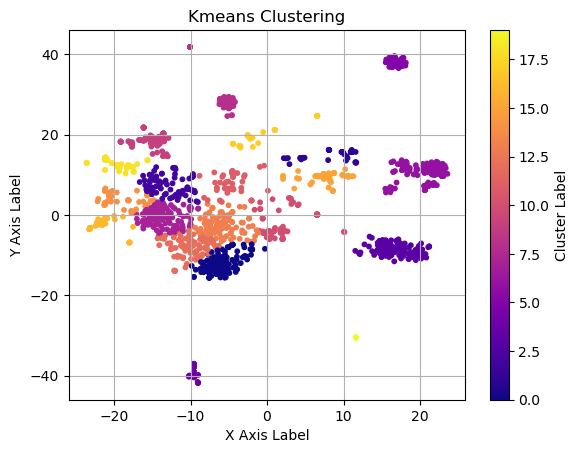

In [30]:
from sklearn.cluster import DBSCAN, OPTICS, HDBSCAN, KMeans
points = top_analysis.embedding
dbscan = DBSCAN(eps=3, min_samples=2)  # Adjust parameters as needed
dbscan.fit(points)
optics = OPTICS(min_samples=200)
optics.fit(points)
hdb = HDBSCAN(min_cluster_size=30)
hdb.fit(points)
kmeans = KMeans(n_init = "auto", n_clusters=20)
kmeans.fit(points)

# Retrieve cluster labels
cluster_labels_dbscan = dbscan.labels_
cluster_labels_optics = optics.labels_ 
cluster_labels_hdb = hdb.labels_
cluster_labels_kmeans = kmeans.labels_

plt.scatter(points[:, 0], points[:, 1], c=cluster_labels_kmeans, cmap='plasma', s=10)
plt.title('Kmeans Clustering')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [25]:
indexes = np.where(cluster_labels_kmeans == 17)[0]
print(indexes)

[   0    1    2    3    4    5    6    7    8    9   89   91   92   93
   94   95   96   97   98   99  100  101  102  103  104  256  258  259
  270  271  275  279  283  284  299  304  309  310  311  312  313  322
  330  500  790  791  792  793  794  795  807  808  810 1357 1439 1440
 1446 1447 1448 1449 1451 1452 1454 1455 1510 1513 1514 1518 1526]


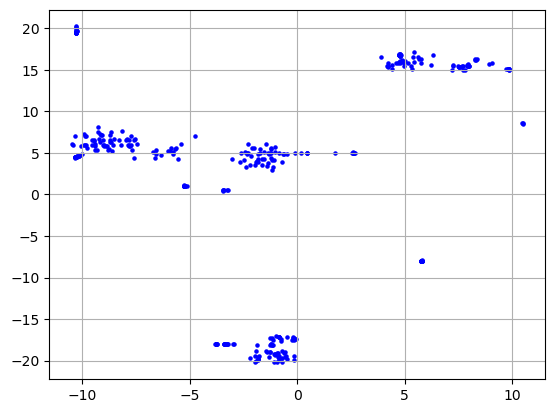

In [26]:
new_analysis = nptsne.hsne_analysis.Analysis(hsne,nptsne.hsne_analysis.EmbedderType.GPU, parent = top_analysis, parent_selection=indexes)
for i in range(1000):
    new_analysis.do_iteration()
    
import matplotlib.pyplot as plt
x_coords = [point[0] for point in new_analysis.embedding]
y_coords = [point[1] for point in new_analysis.embedding]

# Create scatter plot
plt.scatter(x_coords, y_coords, s=5, color='blue')

plt.grid(True)  # Enable grid
plt.show()

In [20]:
hsne.save("save_test.hsne")
